In [14]:
import os
import csv
import parselmouth


import matplotlib.pyplot as plt

In [15]:
transcription = "a"
base_folder = "all_spanish_letters_recordings/aphasia_wav"
file_name = "aphasia/24418.mp4"

In [16]:
wav_filename = file_name.replace(".mp4", ".wav")
snd = parselmouth.Sound(os.path.join(base_folder, wav_filename))

4


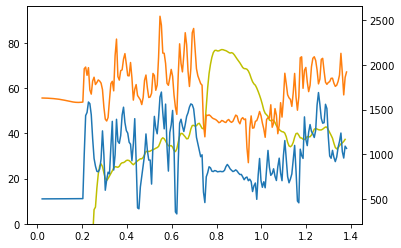

In [17]:
def extract_f1_f2_and_intensity_from_sound(snd):
    formants = snd.to_formant_burg()
    intensity = snd.to_intensity()
    f1 = list()
    f2 = list()
    intensity_list = list()
    for t in formants.t_grid():
        f1.append(formants.get_value_at_time(1,t))
        f2.append(formants.get_value_at_time(2,t))
        intensity_list.append(intensity.get_value(t))

    return f1, f2, intensity_list, formants.t_grid()

def plot_formants_and_intensity(f1, f2, intensity, t):
    plt.plot(t, intensity, color='y')
    plt.ylim(0)
    plt.grid(False)
    plt.twinx()
    plt.plot(t, f1)
    plt.plot(t, f2)



print(len(extract_f1_f2_and_intensity_from_sound(snd)))

plot_formants_and_intensity(*extract_f1_f2_and_intensity_from_sound(snd))

In [18]:
observed_formants = {'a': [682.845033143518, 1347.6680693901671],
 'e': [494.84181512897976, 1619.9787143718208],
 'i': [382.33315846211553, 1657.3348620074385],
 'o': [506.2493853362084, 1101.1472533066992],
 'u': [434.7785079520296, 984.1856223625758]}

observed_formants_std = {'a': [73.7791520366105, 93.04641134935628],
 'e': [55.49710196672828, 132.8479221603176],
 'i': [50.65527125493847, 155.24836087654543],
 'o': [60.20226523820195, 170.6404810742714],
 'u': [50.328755387520836, 193.66177958793827]}


In [19]:
intensity_threshold = 50

In [20]:
for f1, f2, intensity, t in zip(*extract_f1_f2_and_intensity_from_sound(snd)):
    if intensity > intensity_threshold:
        print(f1, f2, intensity, t)

750.9846463064996 1439.426752457272 51.78580023967779 0.7539999999999998
796.1279962130568 1433.8701634482127 60.13589683684064 0.7602499999999998
863.0864146456053 1440.9143619326635 66.4280253326314 0.7664999999999998
851.1910776781237 1429.301235682903 70.49819634671518 0.7727499999999998
813.8238912829568 1411.2736074187735 73.55858284618296 0.7789999999999998
809.2941800760063 1399.576691107568 75.62191371679525 0.7852499999999998
820.8488612179144 1394.0327977174843 76.57356250772257 0.7914999999999998
816.5740294929208 1385.4722011937572 76.65555172676979 0.7977499999999998
806.7209219978156 1371.5380937846326 76.36548687974751 0.8039999999999998
809.2229677287557 1353.6637311232798 76.4077201812526 0.8102499999999998
811.8735110819094 1360.5020306476124 76.73668339379257 0.8164999999999998
808.7213437446485 1378.4043661868845 76.97470874305107 0.8227499999999998
809.371185121272 1372.7174263327643 76.90633039865689 0.8289999999999998
823.5892495960036 1361.0786573894693 76.6681

In [27]:
def get_closer_vowel(f1, f2, theoretical_formants=observed_formants):
    return min(
        map(
            lambda x:
                (x[0], abs(x[1] - f1) + abs(x[2] - f2)),
            ((vowel, t_f1, t_f2) for vowel, (t_f1, t_f2) in theoretical_formants.items())
        ),
        key=lambda x: x[1]
    )

get_closer_vowel(267.6835968566722,1389.4473284288606)

('i', 382.5370951840212)

In [28]:
def evaluate_non_vocal(vowel_and_distance, observed_std=observed_formants_std):
    vowel, distance = vowel_and_distance
    if distance > sum(observed_std[vowel]):
        return (f'non_vocal_{vowel}', distance)
    return vowel_and_distance

evaluate_non_vocal(get_closer_vowel(267.6835968566722,1389.4473284288606))

('non_vocal_i', 382.5370951840212)

In [29]:
for f1, f2, intensity, t in zip(*extract_f1_f2_and_intensity_from_sound(snd)):
    if intensity > intensity_threshold:
        print(t, get_closer_vowel(f1, f2))

0.7539999999999998 ('a', 159.89829623008643)
0.7602499999999998 ('a', 199.48505712758435)
0.7664999999999998 ('a', 273.4876740445836)
0.7727499999999998 ('a', 249.97921082734172)
0.7789999999999998 ('a', 194.58439616804515)
0.7852499999999998 ('a', 178.35776864988918)
0.7914999999999998 ('a', 184.3685564017136)
0.7977499999999998 ('a', 171.53312815299284)
0.8039999999999998 ('a', 147.74591324876303)
0.8102499999999998 ('a', 132.37359631835045)
0.8164999999999998 ('a', 141.8624391958367)
0.8227499999999998 ('a', 156.6126073978479)
0.8289999999999998 ('a', 151.57550892035113)
0.8352499999999998 ('a', 154.15480445178775)
0.8414999999999998 ('a', 189.62062853739064)
0.8477499999999998 ('a', 237.41929514207266)
0.8539999999999998 ('a', 226.61782275184748)
0.8602499999999998 ('a', 177.3541740435669)
0.8664999999999998 ('a', 150.8880385578069)
0.8727499999999998 ('a', 148.285910508111)
0.8789999999999998 ('a', 190.5269185647545)
0.8852499999999998 ('a', 236.44638921096077)
0.8914999999999998 

In [30]:
abs(-5)

5

In [31]:
min

<function min>

In [32]:
file_name = "all_spanish_letters_recordings/aphasia_letters.txt"
with open(file_name) as f:
    all_recordings = f.readlines()
all_recordings

['aphasia/24410.mp4,a\n',
 'aphasia/24418.mp4,a\n',
 'aphasia/24689.mp4,a\n',
 'aphasia/24740.mp4,a\n',
 'aphasia/25130.mp4,a\n',
 'aphasia/25144.mp4,a\n',
 'aphasia/25475.mp4,a\n',
 'aphasia/26352.mp4,a\n',
 'aphasia/26400.mp4,a\n',
 'aphasia/26597.mp4,a\n',
 'aphasia/26604.mp4,a\n',
 'aphasia/32053.mp4,a\n',
 'aphasia/36558.mp4,a\n',
 'aphasia/24416.mp4,be\n',
 'aphasia/24690.mp4,be\n',
 'aphasia/24741.mp4,be\n',
 'aphasia/25131.mp4,be\n',
 'aphasia/25145.mp4,be\n',
 'aphasia/25476.mp4,be\n',
 'aphasia/26353.mp4,be\n',
 'aphasia/26401.mp4,be\n',
 'aphasia/26598.mp4,be\n',
 'aphasia/32054.mp4,be\n',
 'aphasia/36559.mp4,be\n',
 'aphasia/24417.mp4,ce\n',
 'aphasia/24691.mp4,ce\n',
 'aphasia/24742.mp4,ce\n',
 'aphasia/25132.mp4,ce\n',
 'aphasia/25146.mp4,ce\n',
 'aphasia/25477.mp4,ce\n',
 'aphasia/26354.mp4,ce\n',
 'aphasia/26402.mp4,ce\n',
 'aphasia/26599.mp4,ce\n',
 'aphasia/32055.mp4,ce\n',
 'aphasia/36560.mp4,ce\n',
 'aphasia/24420.mp4,de\n',
 'aphasia/24692.mp4,de\n',
 'aphasia/2471

In [33]:
formants_dir = "all_formants_observed_formants"
os.makedirs(formants_dir, exist_ok=True)

In [ ]:
for record in all_recordings:
    record_name, transcription = record.replace("mp4", "wav").replace("\n", "").split(",")
    record_path = os.path.join(base_folder, record_name)
    transcription_file_path = os.path.join(formants_dir, f"{record_name.replace('.wav', '').split('/')[-1]}-{transcription}.csv")
    if os.path.exists(record_path):
        snd = parselmouth.Sound(record_path)
        field_names = ["t", "f1", "f2", "i", "vowel", "distance", "std_to_vowel"]

        with open(transcription_file_path, "w+") as tf:
            writer = csv.DictWriter(tf, field_names, dialect='unix')
            writer.writeheader()
            for f1, f2, intensity, t in zip(*extract_f1_f2_and_intensity_from_sound(snd)):
                if intensity > intensity_threshold:
                    vowel, distance = get_closer_vowel(f1, f2)
                    vowel_non_vowel, distance = evaluate_non_vocal((vowel, distance))
                    writer.writerow({
                        "t": t,
                        "f1": f1,
                        "f2": f2,
                        "i": intensity,
                        "vowel": vowel_non_vowel,
                        "distance": distance,
                        "std_to_vowel": sum(observed_formants_std[vowel])
                    })


    else:
        print(f"Record file {record_path} does not exists")
    print(record_name, transcription)